[Day 25 - Advent of Code 2023](https://adventofcode.com/2023/day/25)

<article class="day-desc">
 <h2>
  --- Day 25: Snowverload ---
 </h2>
 <p>
  <em>
   Still
  </em>
  somehow without snow, you go to the last place you haven't checked: the center of Snow Island, directly below the waterfall.
 </p>
 <p>
  Here, someone has clearly been trying to fix the problem. Scattered everywhere are hundreds of weather machines, almanacs, communication modules, hoof prints, machine parts, mirrors, lenses, and so on.
 </p>
 <p>
  Somehow, everything has been
  <em>
   wired together
  </em>
  into a massive snow-producing apparatus, but nothing seems to be running. You check a tiny screen on one of the communication modules:
  <code>
   Error 2023
  </code>
  . It doesn't say what
  <code>
   Error 2023
  </code>
  means, but it
  <em>
   does
  </em>
  have the phone number for a support line printed on it.
 </p>
 <p>
  "Hi, you've reached Weather Machines And So On, Inc. How can I help you?" You explain the situation.
 </p>
 <p>
  "Error 2023, you say? Why, that's a power overload error, of course! It means you have too many components plugged in. Try unplugging some components and--" You explain that there are hundreds of components here and you're in a bit of a hurry.
 </p>
 <p>
  "Well, let's see how bad it is; do you see a
  <em>
   big red reset button
  </em>
  somewhere? It should be on its own module. If you push it, it probably won't fix anything, but it'll report how overloaded things are." After a minute or two, you find the reset button; it's so big that it takes two hands just to get enough leverage to push it. Its screen then displays:
 </p>
 <pre><code>SYSTEM OVERLOAD!

Connected components would require
power equal to at least <em class="star">100 stars</em>!
</code></pre>
 <p>
  "Wait,
  <em>
   how
  </em>
  many components did you say are plugged in? With that much equipment, you could produce snow for an
  <em>
   entire
  </em>
  --" You disconnect the call.
 </p>
 <p>
  You have nowhere near that many stars - you need to find a way to disconnect at least half of the equipment here, but it's already Christmas! You only have time to disconnect
  <em>
   three wires
  </em>
  .
 </p>
 <p>
  Fortunately, someone left a wiring diagram (your puzzle input) that shows
  <em>
   how the components are connected
  </em>
  . For example:
 </p>
 <pre><code>jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr
</code></pre>
 <p>
  Each line shows the
  <em>
   name of a component
  </em>
  , a colon, and then
  <em>
   a list of other components
  </em>
  to which that component is connected. Connections aren't directional;
  <code>
   abc: xyz
  </code>
  and
  <code>
   xyz: abc
  </code>
  both represent the same configuration. Each connection between two components is represented only once, so some components might only ever appear on the left or right side of a colon.
 </p>
 <p>
  In this example, if you disconnect the wire between
  <code>
   hfx
  </code>
  /
  <code>
   pzl
  </code>
  , the wire between
  <code>
   bvb
  </code>
  /
  <code>
   cmg
  </code>
  , and the wire between
  <code>
   nvd
  </code>
  /
  <code>
   jqt
  </code>
  , you will
  <em>
   divide the components into two separate, disconnected groups
  </em>
  :
 </p>
 <ul>
  <li>
   <code>
    <em>
     9
    </em>
   </code>
   components:
   <code>
    cmg
   </code>
   ,
   <code>
    frs
   </code>
   ,
   <code>
    lhk
   </code>
   ,
   <code>
    lsr
   </code>
   ,
   <code>
    nvd
   </code>
   ,
   <code>
    pzl
   </code>
   ,
   <code>
    qnr
   </code>
   ,
   <code>
    rsh
   </code>
   , and
   <code>
    rzs
   </code>
   .
  </li>
  <li>
   <code>
    <em>
     6
    </em>
   </code>
   components:
   <code>
    bvb
   </code>
   ,
   <code>
    hfx
   </code>
   ,
   <code>
    jqt
   </code>
   ,
   <code>
    ntq
   </code>
   ,
   <code>
    rhn
   </code>
   , and
   <code>
    xhk
   </code>
   .
  </li>
 </ul>
 <p>
  Multiplying the sizes of these groups together produces
  <code>
   <em>
    54
   </em>
  </code>
  .
 </p>
 <p>
  Find the three wires you need to disconnect in order to divide the components into two separate groups.
  <em>
   What do you get if you multiply the sizes of these two groups together?
  </em>
 </p>
</article>


In [145]:
import helpers
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [146]:
puzzle_input = helpers.import_input(25)

## Part 1

In [147]:
test_puzzle_input_part_1 = """jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr""".splitlines()

## Networkx

This implementation uses the [Networkx](https://networkx.org/) library to represent the graph and find the connected components.

In [148]:
def make_graph(input):
    """Make a graph from the input"""
    graph = nx.Graph()
    for line in input:
        source, targets = line.split(':')
        source = source.strip()
        targets = targets.strip().split()
        for target in targets:
            graph.add_edge(source, target)
    return graph

def part_1(input):
    """Part 1 solver"""
    graph = make_graph(input)
    cut_value, partion = nx.stoer_wagner(graph)
    return len(partion[0]) * len(partion[1])


assert part_1(test_puzzle_input_part_1) == 54

In [149]:
part_1(puzzle_input)

572000

## Manual

This implementation uses a manual approach to find the connected components.

### Graph

In [150]:
class Graph:
    """A graph class"""
    def __init__(self):
        self.vertices = {}
        self.edges = {}

    def add_vertex(self, vertex):
        self.vertices[vertex.get_name()] = vertex

    def add_edge(self, v1_name, v2_name):
        if v1_name == v2_name:
            return
        
        v1 = self.get_or_add_vertex_by_name(v1_name)
        v2 = self.get_or_add_vertex_by_name(v2_name)

        edge = Edge(v1, v2)

        self.edges[str(edge)] = edge
        v1.add_edge(edge)
        v2.add_edge(edge)

    def remove_edge(self, edge):
        v1 = edge.v1
        v2 = edge.v2

        if edge in v1.edges:
            v1.edges.remove(edge)
        
        if edge in v2.edges:
            v2.edges.remove(edge)
        
        if str(edge) in self.edges:
            del self.edges[str(edge)]

    def get_edge(self, v1, v2):
        for edge in self.edges.values():
            if edge.v1 == v1 and edge.v2 == v2:
                return edge
            elif edge.v1 == v2 and edge.v2 == v1:
                return edge
        return None

    def get_or_add_vertex_by_name(self, vertex_name):
        if vertex_name in self.vertices:
            return self.vertices[vertex_name]
        else:
            vertex = Vertex(vertex_name)
            self.add_vertex(vertex)
            return vertex
        
    def to_networkx(self):
        """Return a networkx graph"""
        G = nx.Graph()
        for edge in self.edges.values():
            G.add_edge(edge.v1.get_name(), edge.v2.get_name())
        return G

    def plot(self):
        """Plot the graph"""
        G = self.to_networkx()
        nx.draw(G, with_labels=True)
        plt.show()
        
    def to_ajacency_matrix(self):
        """Return the adjacency matrix of the graph"""
        matrix = np.zeros((len(self.vertices), len(self.vertices)))
        for edge in self.edges.values():
            v1_index = list(self.vertices.keys()).index(edge.v1.get_name())
            v2_index = list(self.vertices.keys()).index(edge.v2.get_name())
            matrix[v1_index, v2_index] = 1
            matrix[v2_index, v1_index] = 1

        return matrix
         
    def __getitem__(self, key):
        if key in self.vertices:
            return self.vertices[key]
        elif isinstance(key, int):
            return list(self.vertices.values())[int(key)]

        raise KeyError(f"Vertex {key} not found")
    
    def __setitem__(self, key, value):
        if key in self.vertices:
            self.vertices[key] = value
        elif isinstance(key, int):
            list(self.vertices.values())[int(key)] = value
        else:
            raise KeyError(f"Vertex {key} not found")
    
    def __delitem__(self, key):
        if key in self.vertices:
            del self.vertices[key]
        elif isinstance(key, int):
            del list(self.vertices.values())[int(key)]
        else:
            raise KeyError(f"Vertex {key} not found")
        
    def __len__(self):
        return len(self.vertices)
    
    def __repr__(self):
        return f"Graph({self.vertices}, {self.edges})"
    

    def deepcopy(self):
        copied_graph = Graph()
        for vertex in self.vertices.values():
            copied_graph.add_vertex(Vertex(vertex.name))
        for edge in self.edges.values():
            v1_name = edge.v1.get_name()
            v2_name = edge.v2.get_name()
            copied_graph.add_edge(v1_name, v2_name)
        return copied_graph

    def __deepcopy__(self):
        return self.deepcopy()
    
    @staticmethod
    def make_from_input(input):
        """Make a graph from the input"""
        graph = Graph()
        for line in input:
            source, targets = line.split(':')
            source = source.strip()
            targets = targets.strip().split()
            for target in targets:
                graph.add_edge(source, target)

        return graph

class Vertex:
    """A vertex class"""
    def __init__(self, name):
        self.name = name
        self.edges = []

    def __repr__(self):
        return f"Vertex({self.name})"

    def __str__(self):
        return self.name
    
    def __getitem__(self, key):
        return self.edges[key]

    def add_edge(self, edge):
        self.edges.append(edge)

    def get_edges(self):
        return self.edges

    def get_name(self):
        return self.name
    
class Edge:
    """An edge class"""
    def __init__(self, v1, v2, weight=1):
        self.v1 = v1
        self.v2 = v2
        self.weight = weight

    def __repr__(self):
        return f"Edge({self.v1}, {self.v2})"

    def __str__(self):
        return f"({self.v1}, {self.v2})"

    def get_vertices(self):
        return self.v1, self.v2
    
    def replace_vertex(self, old_vertex, new_vertex):
        if self.v1 == old_vertex:
            self.v1 = new_vertex
        elif self.v2 == old_vertex:
            self.v2 = new_vertex

### Stoer-Wagner
[Stoer–Wagner algorithm - Wikipedia](https://en.wikipedia.org/wiki/Stoer%E2%80%93Wagner_algorithm)

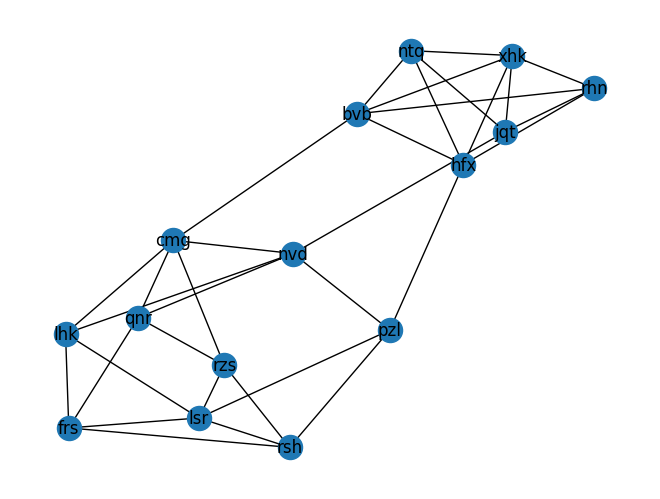

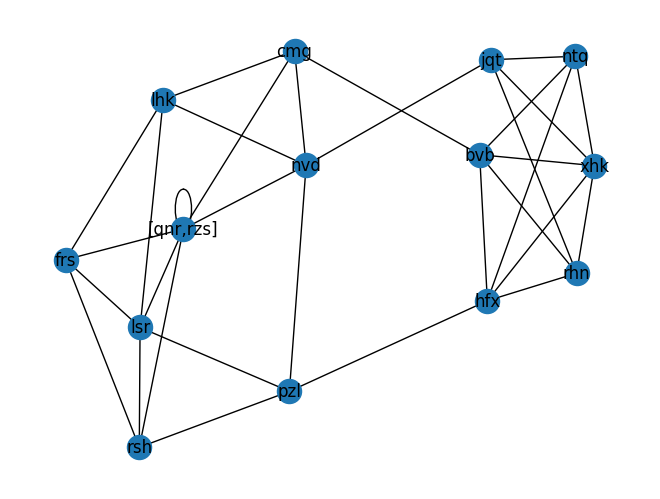

Phase 1 done


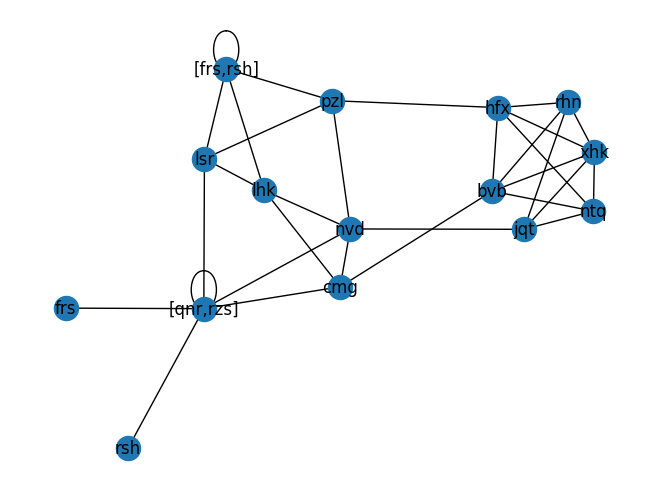

Phase 2 done


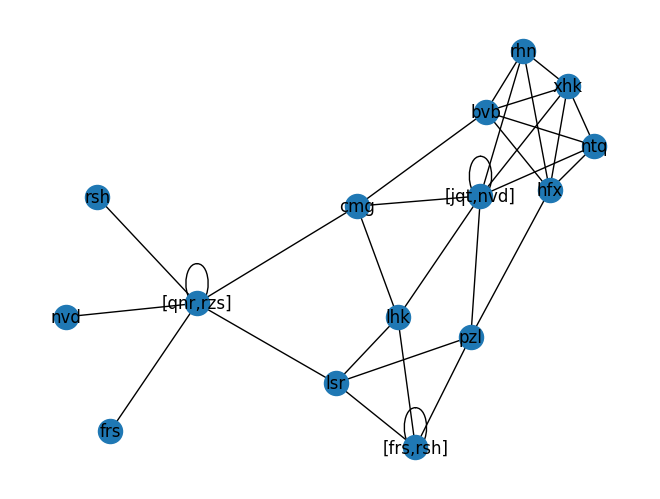

Phase 3 done


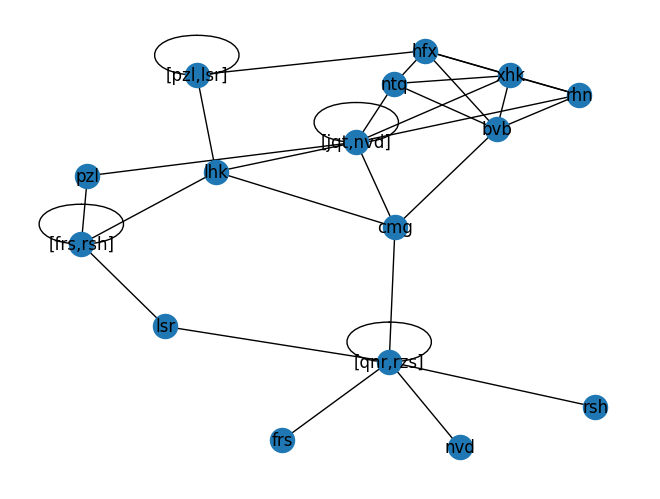

Phase 4 done


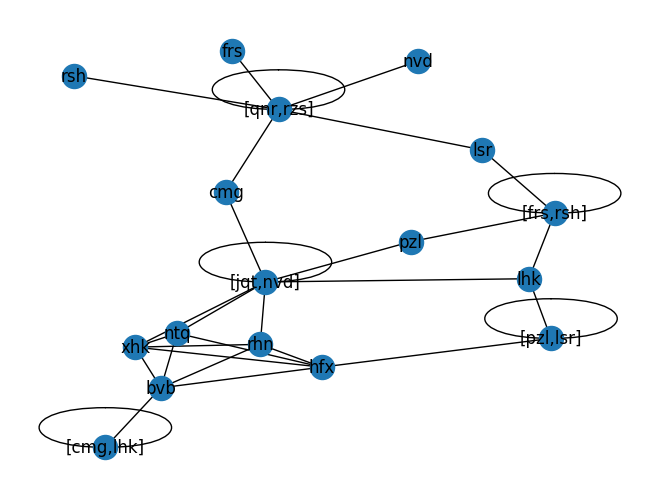

Phase 5 done


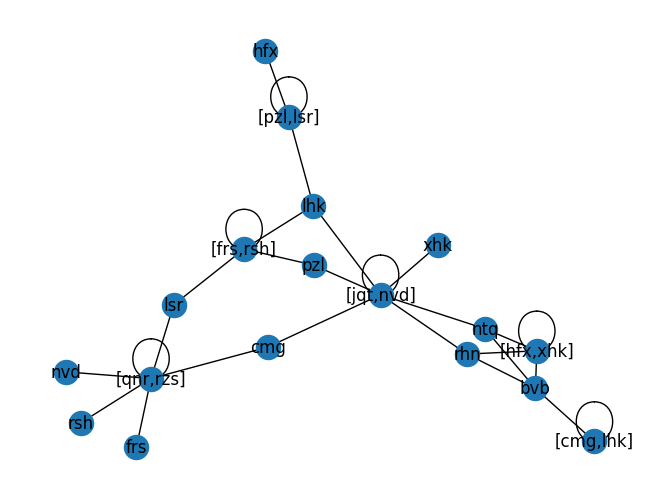

Phase 6 done


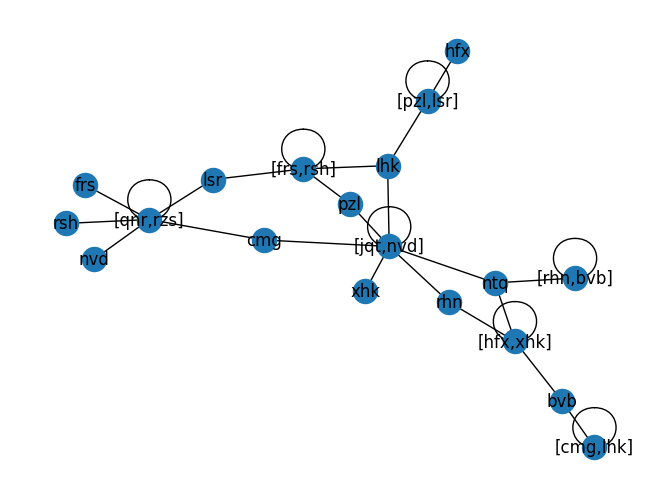

Phase 7 done


IndexError: list index out of range

In [151]:
INT_MAX = float('inf')
INT_MIN = float('-inf')

class StoerWagner:
    """A class for the Stoer-Wagner algorithm"""
    def __init__(self, graph):
        self.graph = graph.deepcopy()
        self.V_i = 0

    def run(self):
        """Run the algorithm"""
        min_cut = (INT_MAX, None)
        solutions = []

        while len(self.graph) > 2:    
            S = self.minimum_cut_phase(self.graph)
            s = S[-1]
            t = S[-2]
            weight = sum([edge.weight for edge in t.get_edges()])
            if weight < min_cut[0]:
                min_cut = (weight, S)
            self.merge_vertices(s, t)
            solutions.append({"i": self.V_i, "graph": self.graph.deepcopy(), "S":S, "weight":weight, "s": s, "t": t})
            self.graph.plot()
            self.V_i += 1
            print(f"Phase {self.V_i} done")

        partion1 = min_cut[1]
        partion2 = list(filter(lambda x: x not in partion1, self.graph.vertices.values()))
        return min_cut[0], partion1, partion2
        
    def minimum_cut_phase(self, G):
        """Find the min cut of the graph"""
        S = [G[0]]
        V = G.vertices
        current_vertex = G[0]

        while len(S) is not len(V):
            edge = self.get_strongest_edge(current_vertex, S)
            current_vertex = edge.v2 if current_vertex != edge.v2 else edge.v1    
            S.append(current_vertex)
        
        return S

    def get_strongest_edge(self, vertex, A, backstep=0):
        """Get the strongest edge of a vertex"""
        if backstep > len(A):
            raise ValueError("Backstab is too large")
        
        if backstep > 0:
            edges = [edge for edge in vertex.get_edges() if not (edge.v1 not in A and edge.v2 not in A)]
        else:
            edges = [edge for edge in vertex.get_edges() if edge.v1 not in A or edge.v2 not in A]

        if len(edges) == 0:
            backstep += 1
            return self.get_strongest_edge(A[-backstep], A, backstep)
        return max(edges, key=lambda x: x.weight, default=None)
    
    def merge_vertices(self, v1, v2):
        """Merge two vertices"""
        # Create a new vertex
        new_vertex = Vertex(f"[{v1.get_name()},{v2.get_name()}]")
        self.graph.add_vertex(new_vertex)
        
        # merge the edges
        self.merge_edges(new_vertex, v1)
        self.merge_edges(new_vertex, v2)

        # remove the old vertices
        self.remove_vertex(v1)
        self.remove_vertex(v2)
        self.remove_self_loops(new_vertex)

    def merge_edges(self, v1, v2):
        for edge in v2.get_edges():
            if edge in v1.get_edges():
                exising_edge = v1.get_edges()[v1.get_edges().index(edge)]
                exising_edge.weight += edge.weight
            else:
                edge.replace_vertex(v2, v1)

    def remove_self_loops(self, vertex):
        """Remove self loops"""
        for edge in vertex.get_edges():
            if edge.v1 == edge.v2:
                self.graph.remove_edge(edge)

    def remove_vertex(self, vertex):
        """Remove a vertex"""
        if vertex.get_name() in self.graph.vertices:
            del self.graph[vertex.get_name()]
            for edge in vertex.get_edges():
                self.graph.remove_edge(edge)
    
           
def part_1(input):
    graph = Graph.make_from_input(input)
    stoer_wagner = StoerWagner(graph)
    min_cut, partition1, partition2 = stoer_wagner.run()
    return len(partition1) * len(partition2)


G_test = Graph.make_from_input(test_puzzle_input_part_1)
G_test.plot()

assert part_1(test_puzzle_input_part_1) == 54

In [ ]:
part_1(puzzle_input)

NameError: name 'Graph' is not defined

## Part 2

You climb over weather machines, under giant springs, and narrowly avoid a pile of pipes as you find and disconnect the three wires.

A moment after you disconnect the last wire, the big red reset button module makes a small ding noise:

```
System overload resolved!
Power required is now 50 stars.
```

Out of the corner of your eye, you notice goggles and a loose-fitting hard hat peeking at you from behind an ultra crucible. You think you see a faint glow, but before you can investigate, you hear another small ding:

Power required is now 49 stars.

```
Please supply the necessary stars and
push the button to restart the system.
You don't have enough stars to restart the system, though. You need 37 more.
```

In [ ]:
test_puzzle_input_part_2 = """
""".splitlines()

In [ ]:
def part_2(input):
    return None

assert part_2(test_puzzle_input_part_2) == None

In [ ]:
part_2(puzzle_input)